In [ ]:
import pandas as pd

df = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv")
print(df.shape)
print(df.describe())
print(df.info())
df.head()

(500, 6)
         Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
count  500.000000           500.000000            500.000000   
mean    47.313440            86.573100              5.298620   
std     26.768797            64.293403              2.641993   
min      8.570000             7.530000              1.150000   
25%     24.797500            50.510000              2.672500   
50%     42.380000            70.450000              5.670000   
75%     68.080000            88.852500              7.455000   
max    111.210000           299.890000             11.140000   

       Durezza buccia (1-10)  Dolcezza (1-10)  
count             500.000000       500.000000  
mean                7.437640         3.593220  
std                 1.812548         1.264899  
min                 3.070000         1.250000  
25%                 6.152500         2.570000  
50%                 7.340000         3.535000  
75%                 8.615000         4.465000  
max                13.720000  

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


array([[<Axes: title={'center': 'Peso (g)'}>,
        <Axes: title={'center': 'Diametro medio (mm)'}>],
       [<Axes: title={'center': 'Lunghezza media (mm)'}>,
        <Axes: title={'center': 'Durezza buccia (1-10)'}>],
       [<Axes: title={'center': 'Dolcezza (1-10)'}>, <Axes: >]],
      dtype=object)

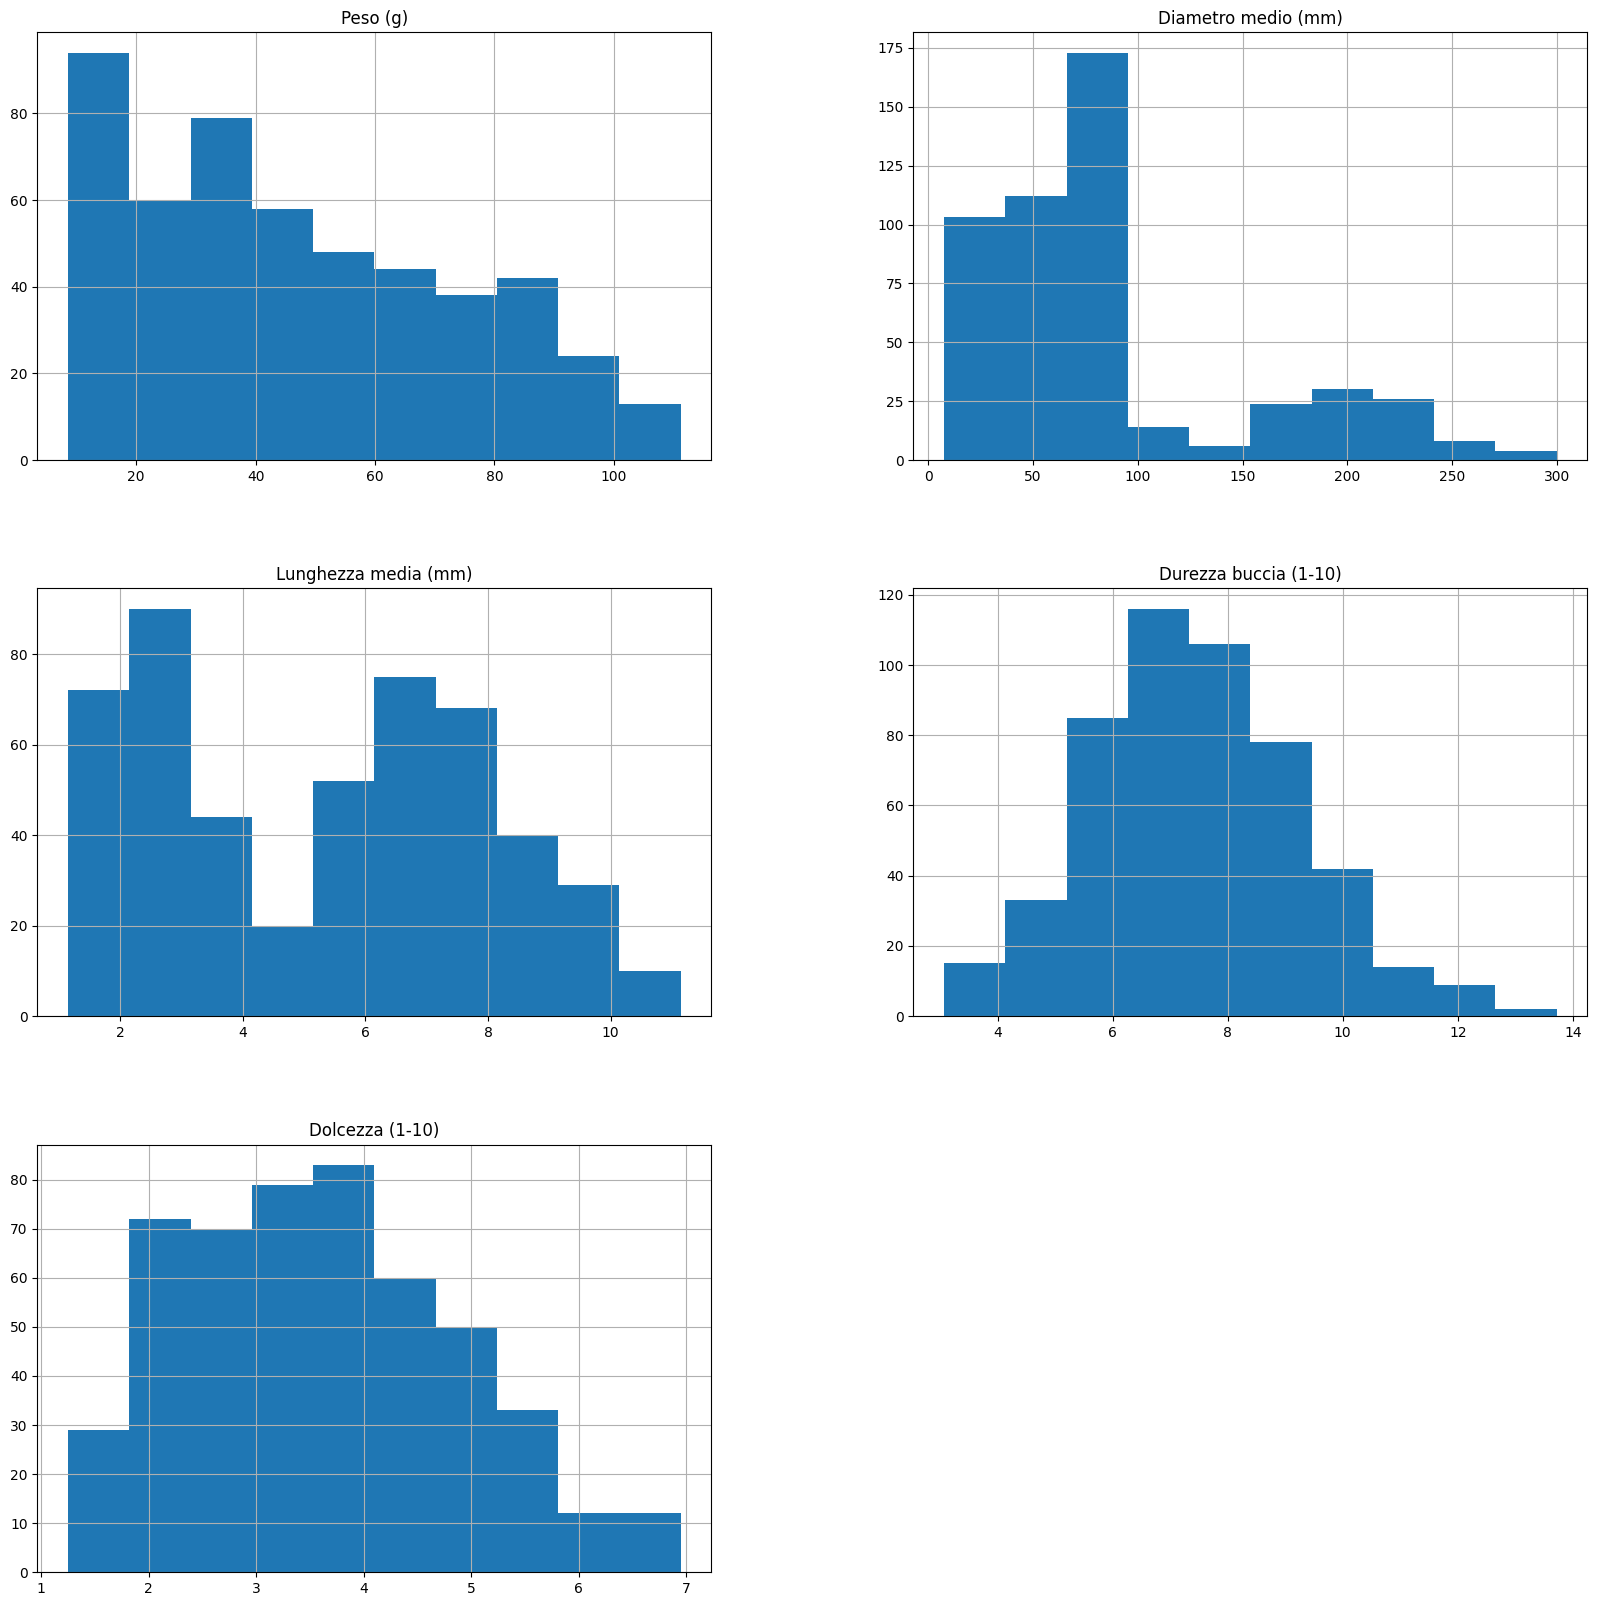

In [ ]:
df.hist(figsize=(20,20))

Ho creato il dataframe dal file csv "fruits.csv". Analizzando il contenuto si può notare che non ci sono valori mancanti e i valori nelle rispettive colonne non necessitano di codifica.

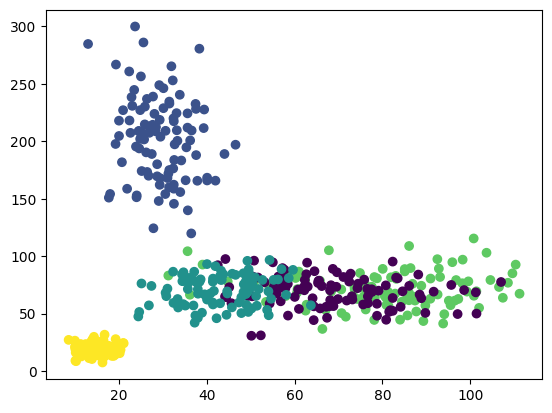

In [91]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt

le = LabelEncoder()
ss = StandardScaler()

X = df.drop('Frutto', axis=1)
y = le.fit_transform(df['Frutto'])
plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y)
plt.show()

Visualizzazione distribuzione dati classificati

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Creazione del dataset di training e di test per addestrare i modelli.

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_proba_train = knn.predict_proba(X_train)
    y_pred_test = knn.predict(X_test)
    y_proba_test = knn.predict_proba(X_test)
    print(f"K: {k}")
    print(f"accuracy train: {accuracy_score(y_train, y_pred_train):.3f}, accuracy test: {accuracy_score(y_test, y_pred_test):.3f}")
    print(f"loss train: {log_loss(y_train, y_proba_train):.4f}, loss test: {log_loss(y_test, y_proba_test):.4f}")
    print("-----------------------------------------------")

K: 1
accuracy train: 1.000, accuracy test: 0.890
loss train: 0.0000, loss test: 3.9648
-----------------------------------------------
K: 2
accuracy train: 0.950, accuracy test: 0.880
loss train: 0.0658, loss test: 1.1853
-----------------------------------------------
K: 3
accuracy train: 0.948, accuracy test: 0.900
loss train: 0.1053, loss test: 0.5120
-----------------------------------------------
K: 4
accuracy train: 0.938, accuracy test: 0.890
loss train: 0.1239, loss test: 0.5059
-----------------------------------------------
K: 5
accuracy train: 0.945, accuracy test: 0.910
loss train: 0.1285, loss test: 0.1740
-----------------------------------------------
K: 6
accuracy train: 0.932, accuracy test: 0.910
loss train: 0.1400, loss test: 0.1646
-----------------------------------------------
K: 7
accuracy train: 0.943, accuracy test: 0.930
loss train: 0.1389, loss test: 0.1624
-----------------------------------------------
K: 8
accuracy train: 0.935, accuracy test: 0.910
loss t

Creazione del modello KNN e visualizzazione delle metriche per k=1-20.
Possiamo notare che il miglior parametro di k è **10**

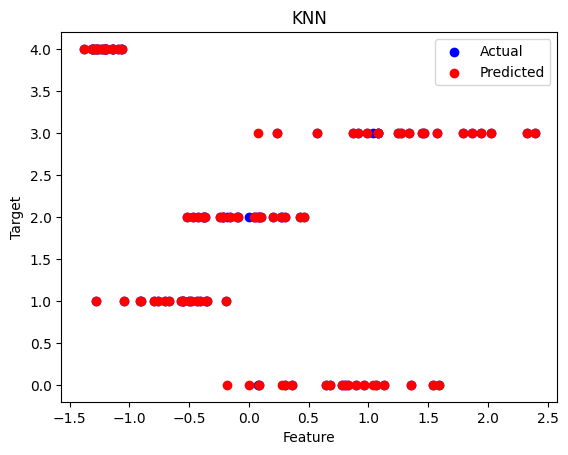

In [133]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

plt.scatter(X_test[:,0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:,0], y_pred, color='red', label='Predicted')
plt.title('KNN')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Conclusioni
Dal grafico in alto si può notare che il modello KNN è abbstanza generalista, quindi in grado di prevedere il frutto con un ottima accuratezza.